## Metadata

| No  | Kolom                          | Deskripsi                                                                 | Tipe Data        | Kategori         | Target/Feature |
|-----|--------------------------------|---------------------------------------------------------------------------|------------------|------------------|----------------|
| 1   | person_age                     | Usia dari orang tersebut                                                  | Numerik (float)    | Continuous       | Feature        |
| 2   | person_gender                  | Gender dari orang tersebut                                                | Kategorikal      | Binary           | Feature        |
| 3   | person_education               | Tingkat pendidikan tertinggi                                              | Kategorikal      | Multiclass       | Feature        |
| 4   | person_income                 | Pendapatan tahunan                                                        | Numerik (float)  | Continuous       | Feature        |
| 5   | person_emp_exp                 | Tahun pengalaman bekerja                                                  | Numerik (int)  | Continuous       | Feature        |
| 6   | person_home_ownership         | Status kepemilikan tempat huni                                            | Kategorikal      | Multiclass       | Feature        |
| 7   | loan_amnt                      | Jumlah pinjaman yang diminta                                              | Numerik (float)  | Continuous       | Feature        |
| 8   | loan_intent                    | Tujuan dari pinjaman                                                      | Kategorikal      | Multiclass       | Feature        |
| 9   | loan_int_rate                  | Suku bunga pinjaman                                                       | Numerik (float)  | Continuous       | Feature        |
| 10  | loan_percent_income           | Jumlah pinjaman sebagai persentase dari pendapatan tahunan                | Numerik (float)  | Continuous       | Feature        |
| 11  | cb_person_cred_hist_length    | Durasi riwayat kredit dalam tahun                                         | Numerik (float)    | Continuous       | Feature        |
| 12  | credit_score                   | Skor kredit dari orang tersebut                                           | Numerik (int)  | Continuous       | Feature        |
| 13  | previous_loan_defaults_on_file| Indikator tunggakan pinjaman sebelumnya (0: Tidak, 1: Ya)                | Kategorikal      | Binary           | Feature        |
| 14  | loan_status                    | Persetujuan pinjaman (1: diterima, 0: ditolak)                            | Kategorikal      | Binary           | **Target**     |


## Import Library and Dataset

In [2]:
# Modul EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modul Machine learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import pickle

In [3]:
df = pd.read_csv("Dataset_A_loan.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [5]:
df['person_income'].max()

5556399.0

## EDA

In [6]:
df.shape

(45000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
df[df.duplicated()]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


**🗝️Keypoints:**
- Data ini memiliki 45000 rows & 14 columns (13 feature + 1 target)
- Terdapat 2250 null values pada kolom person_income
- Sudah tidak ada data duplikat

### Data Cleaning

Mengganti tipedata person_age dan cb_person_cred_hist_length

In [9]:
df['person_age'] = df['person_age'].astype(int)
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].astype(int)

Cleaning tipe data person_gender

In [10]:
df['person_gender'] = df['person_gender'].replace({
    'Male': 'male',
    'fe male': 'female'
})


In [11]:
df['person_gender'].value_counts()

person_gender
male      24844
female    20156
Name: count, dtype: int64

### Check Data Distribution

Bagi numeric column dan categorical column 

In [12]:
num_col = [col for col in df.columns if df[col].dtype != 'O']
cat_col = [col for col in df.columns if df[col].dtype == 'O']

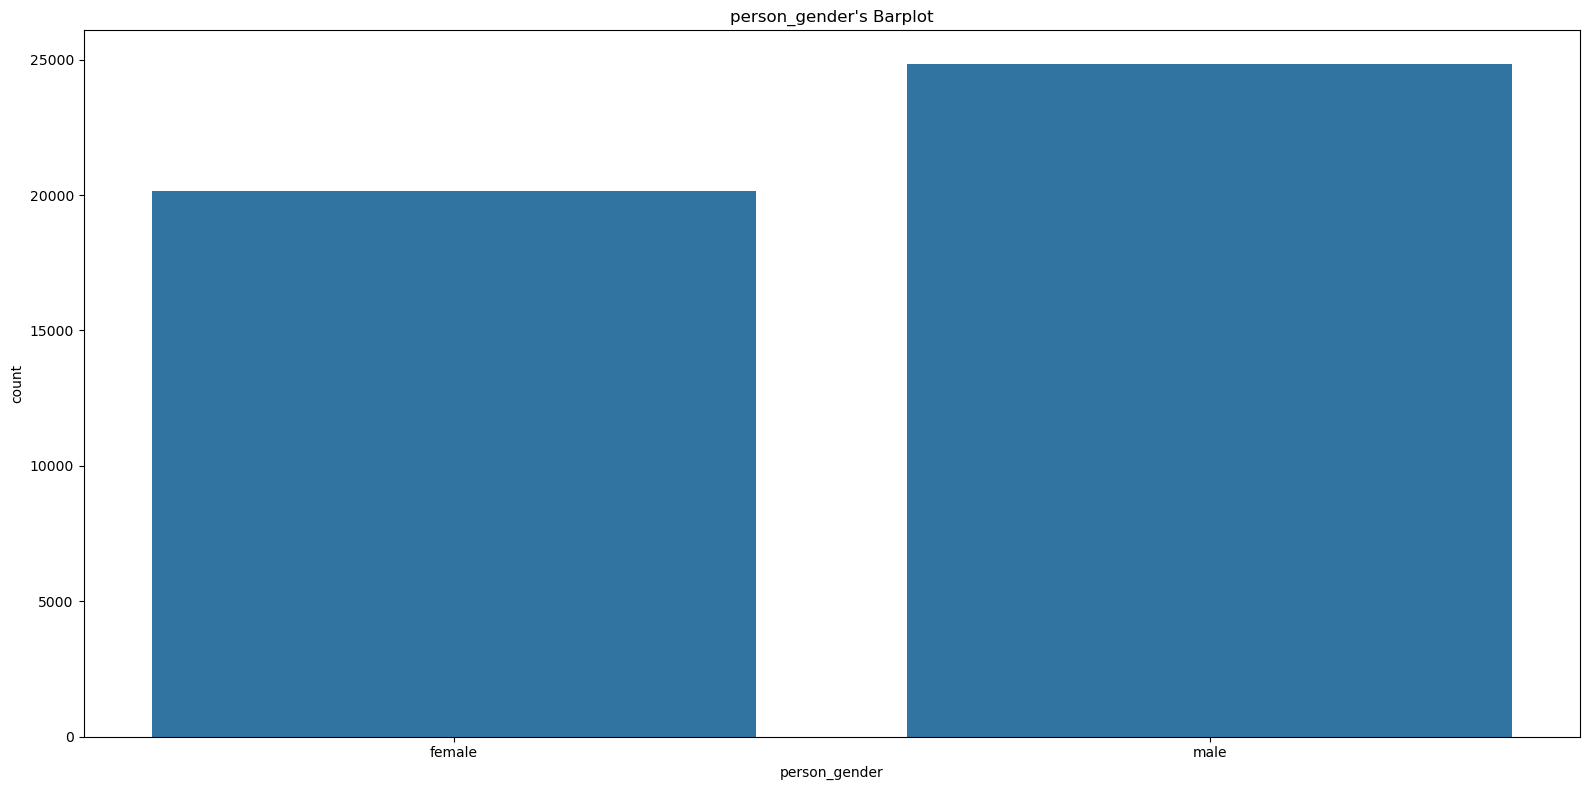

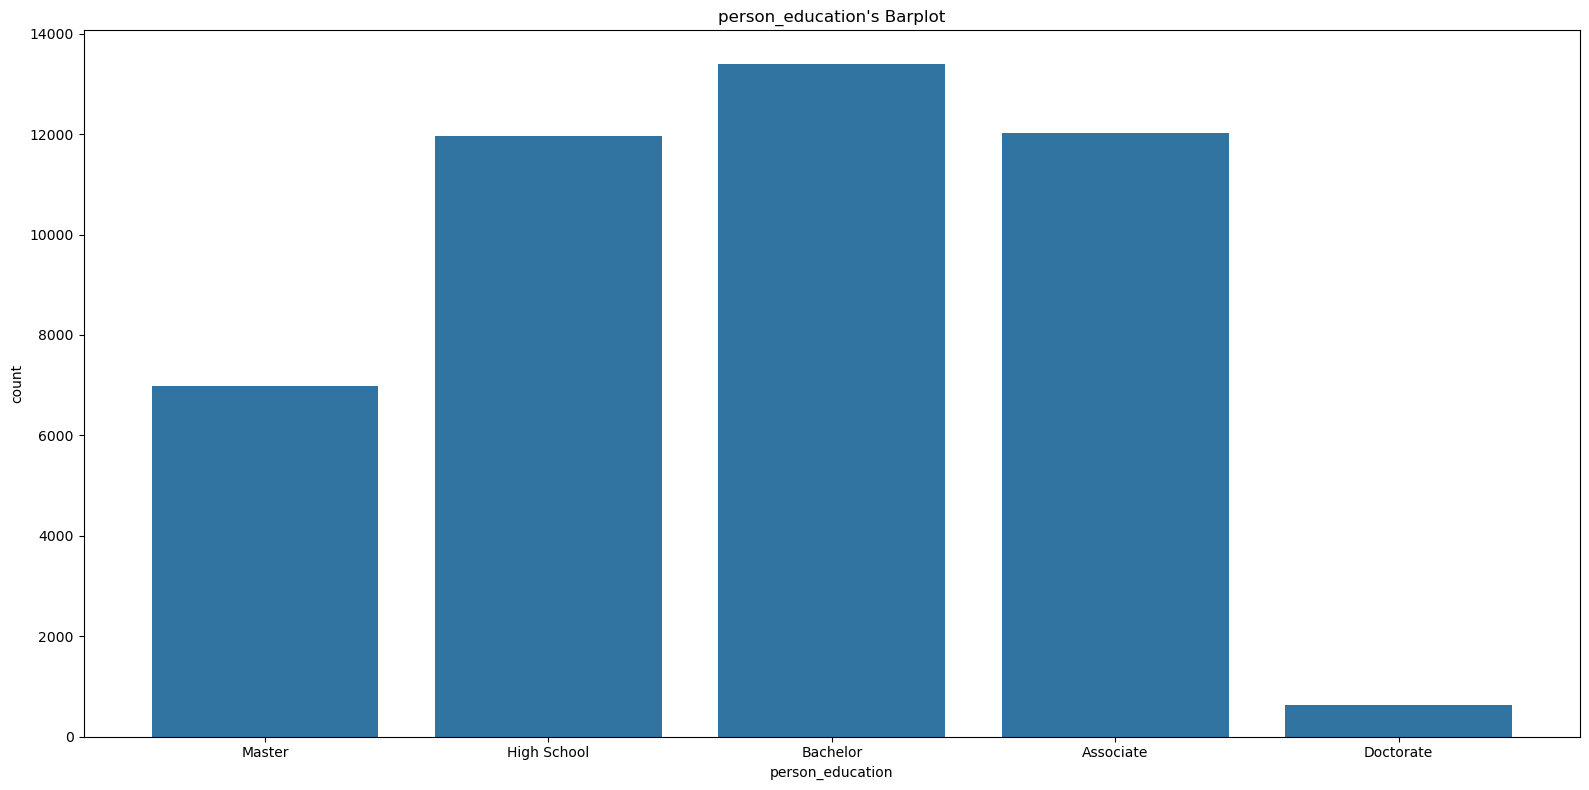

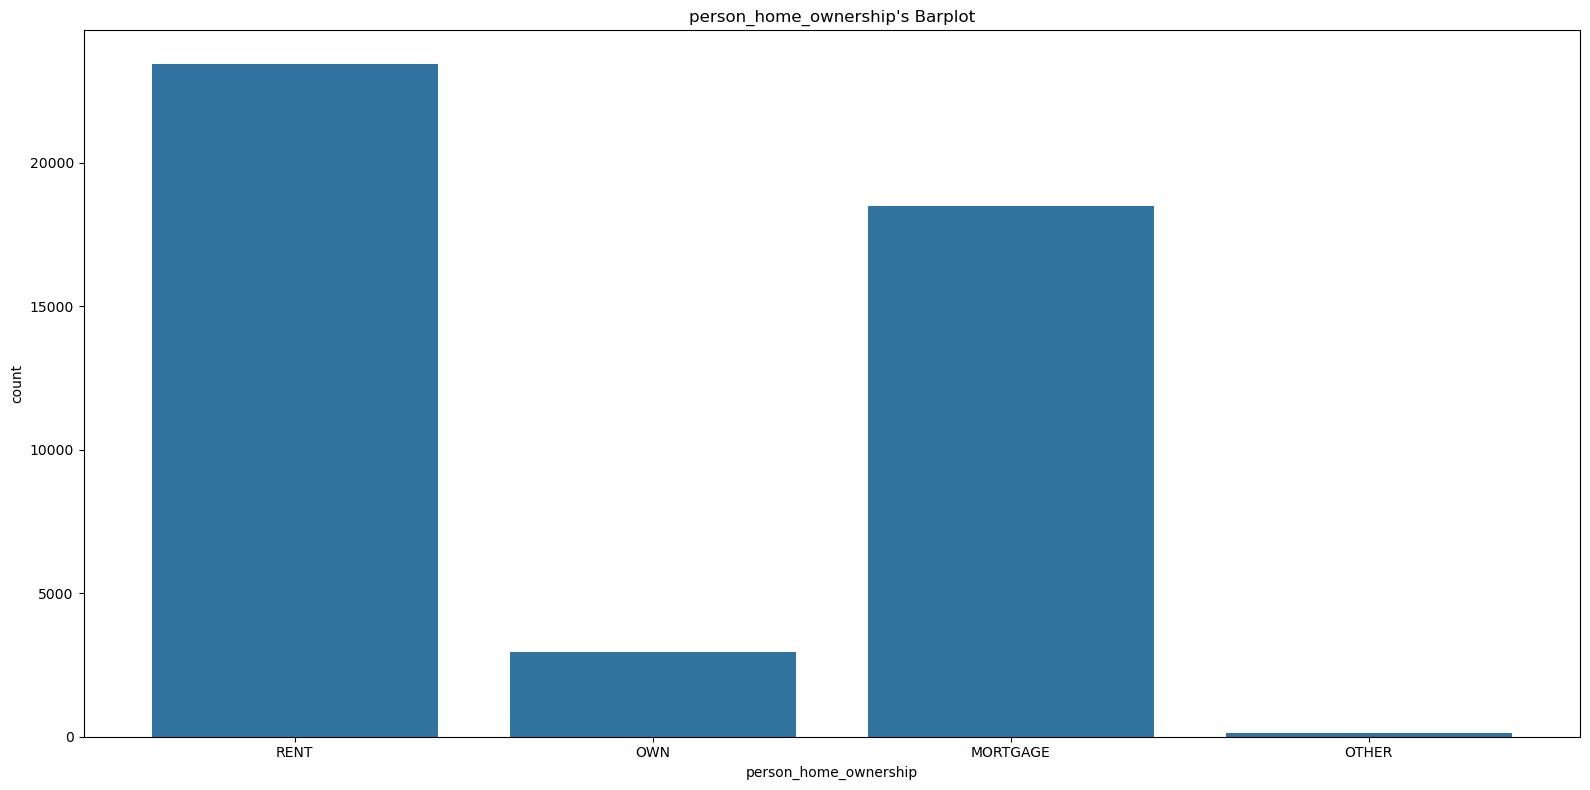

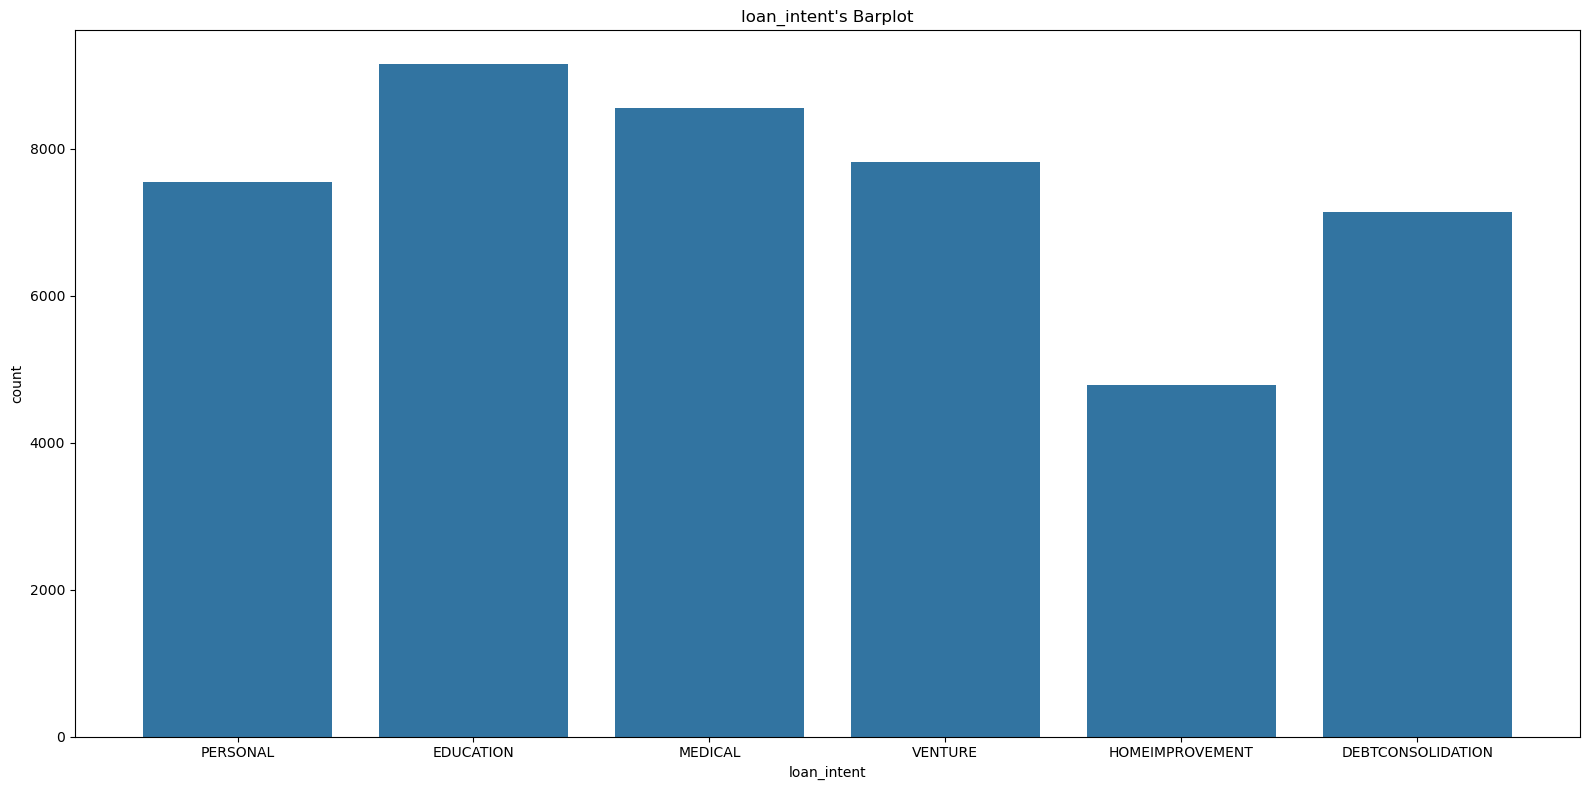

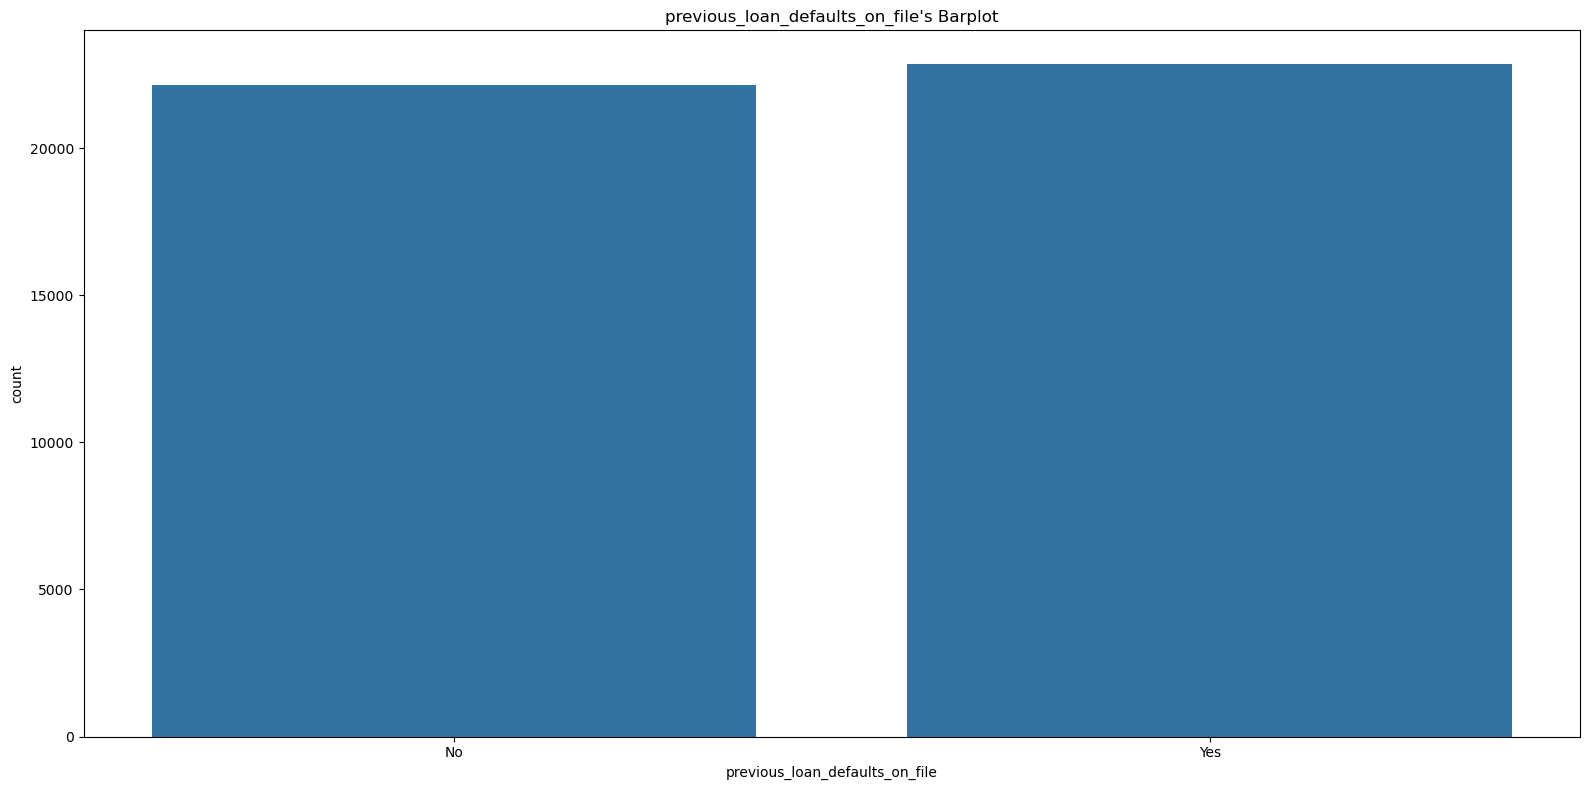

In [13]:
def plot_cat(df, cat_col):
    """
    Plotting bar chart untuk setiap kolom kategorikal
    Menggunakan sns.countplot untuk menghitung total data per kategori
    Set title dan label
    
    Args:
        df: DataFrame
        cat_col: List of categorical columns
    """
    
    for col in cat_col:
        fig, ax = plt.subplots(figsize=(16,8))
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f'{col}\'s Barplot')
        plt.tight_layout()
        plt.plot()

        
plot_cat(df, cat_col)

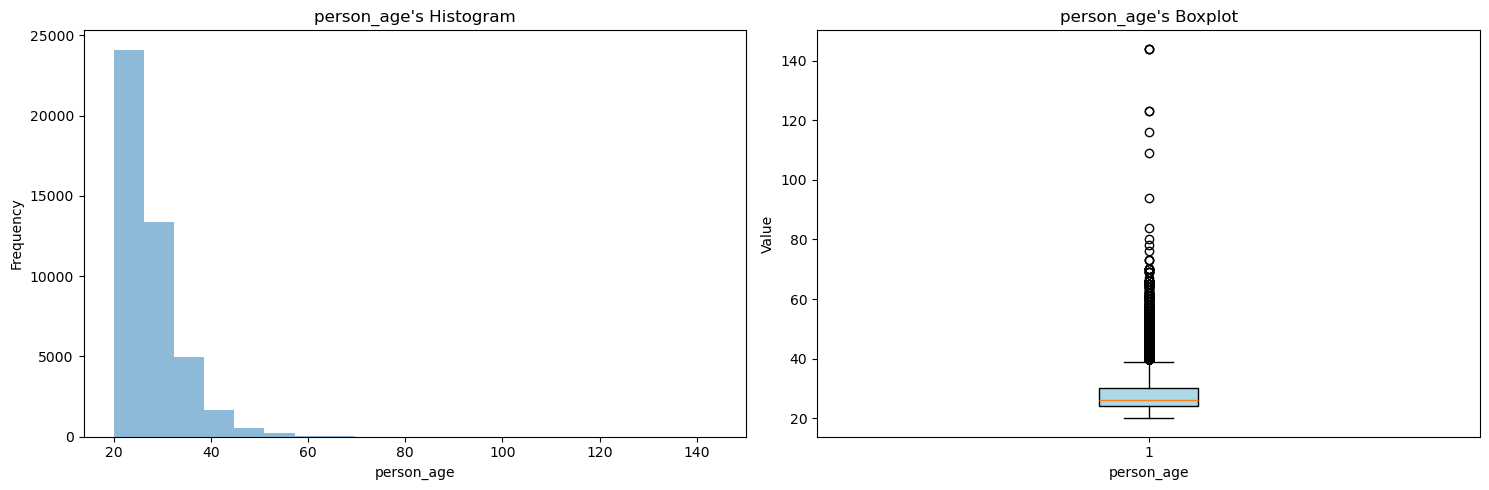

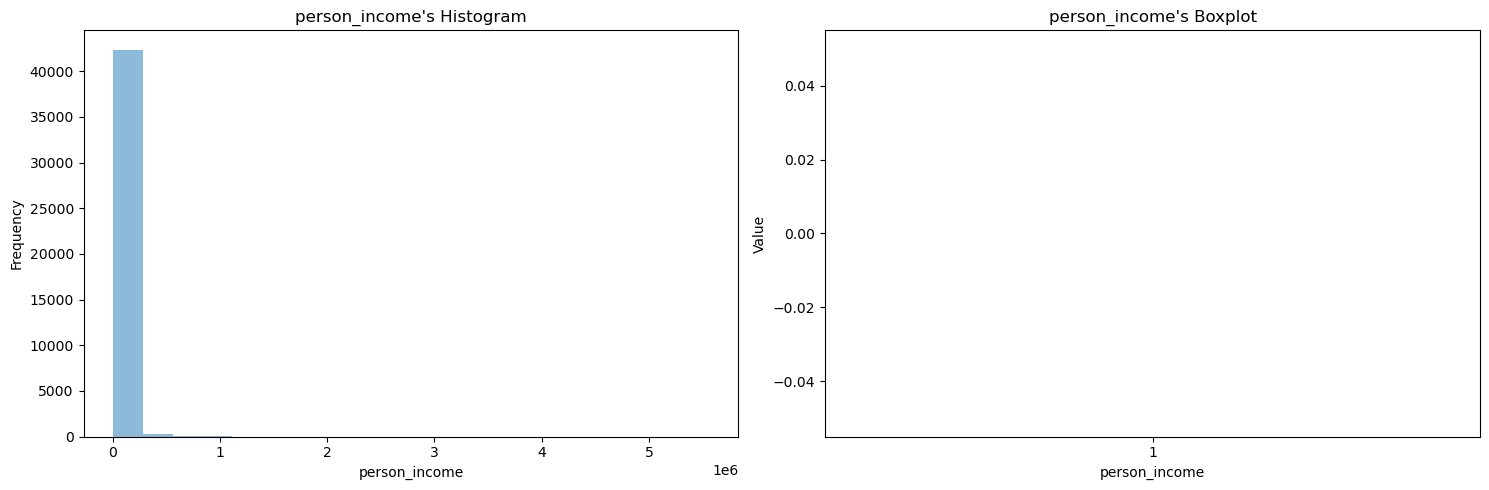

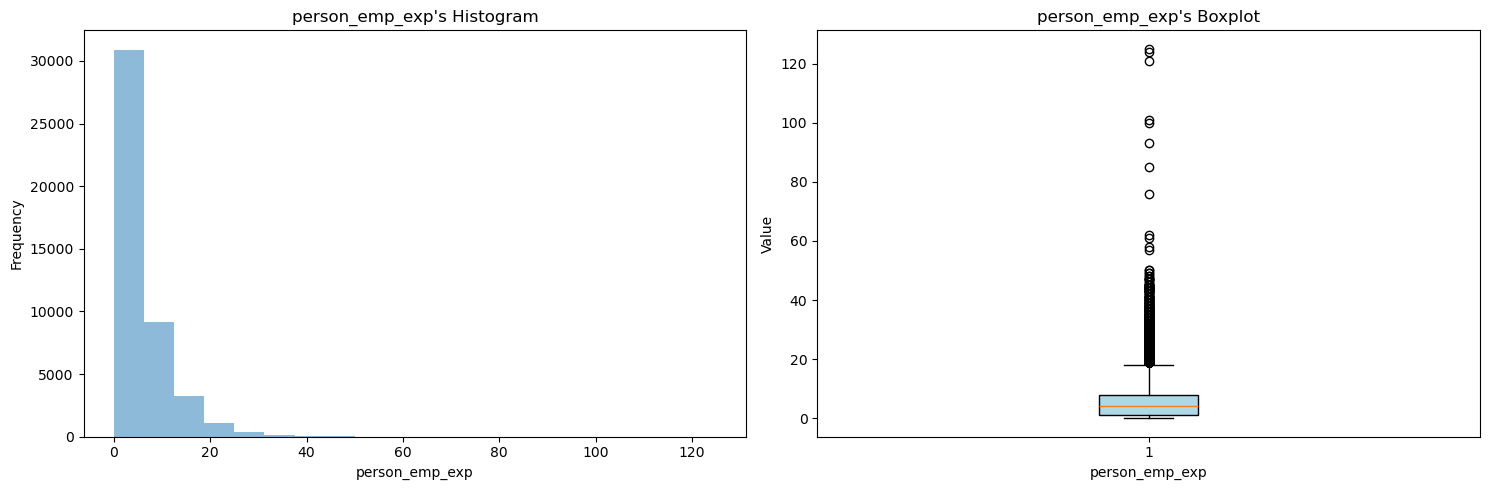

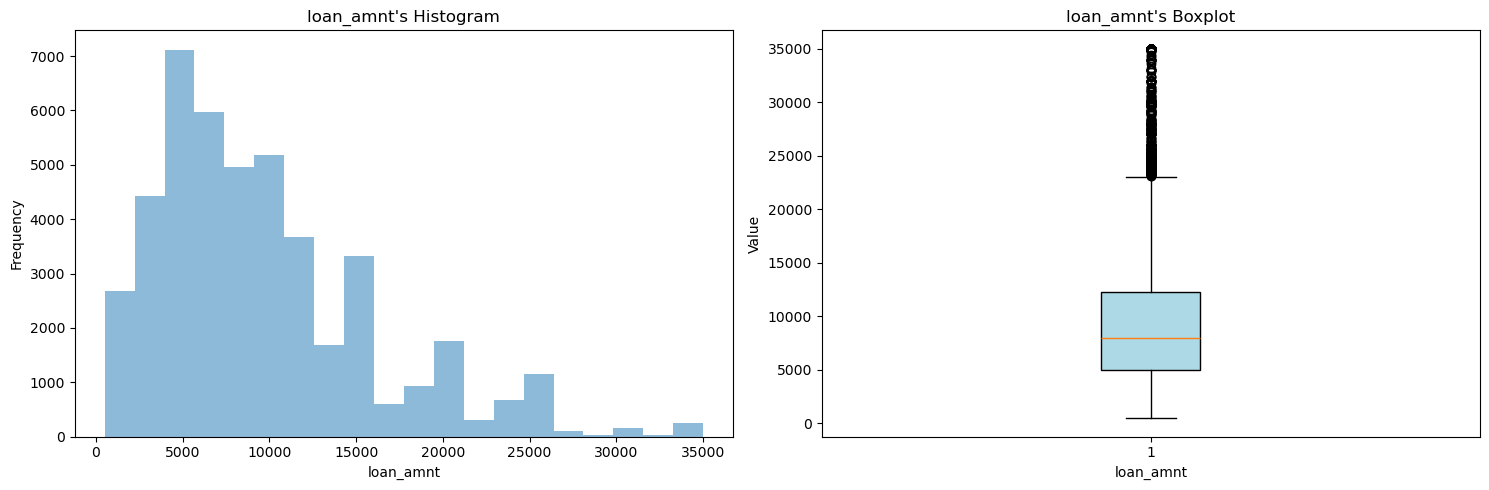

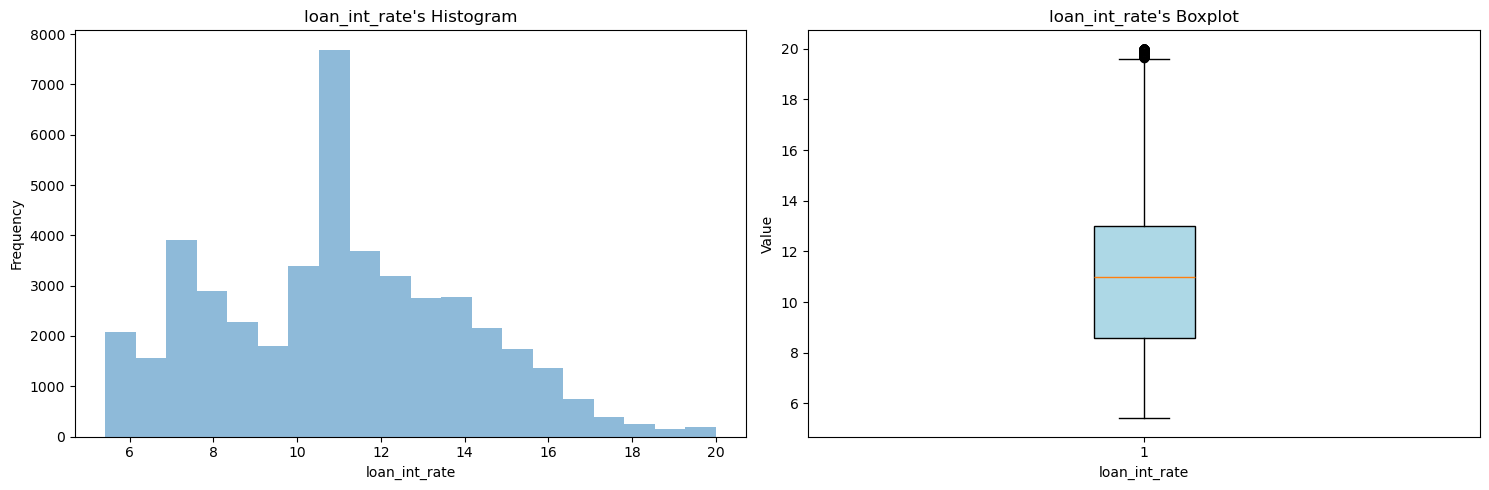

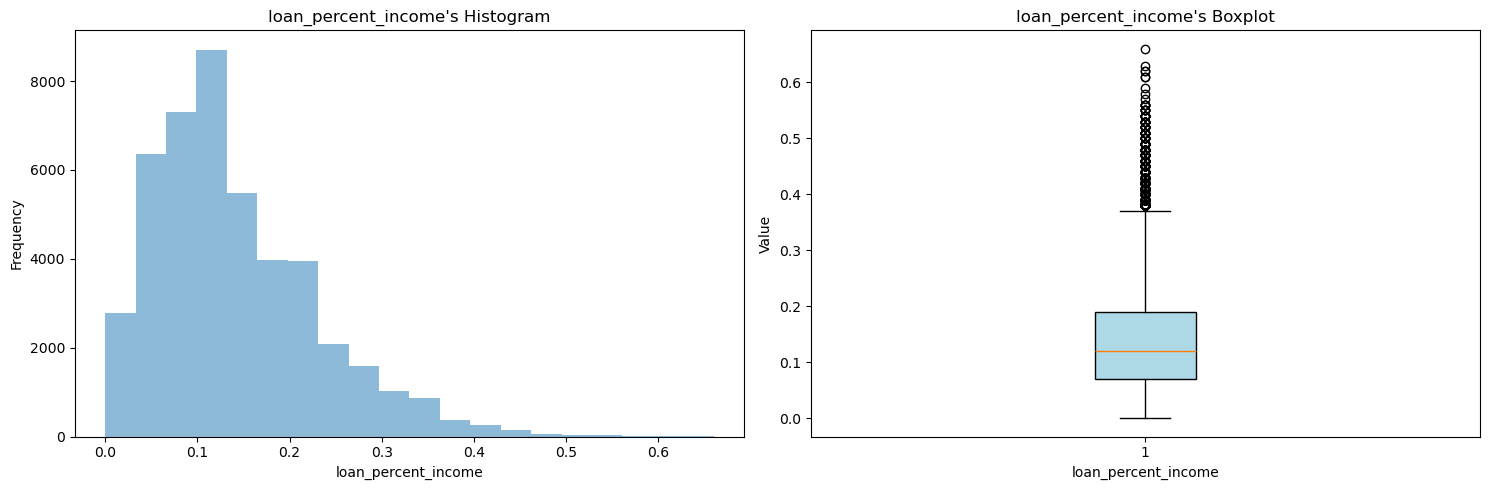

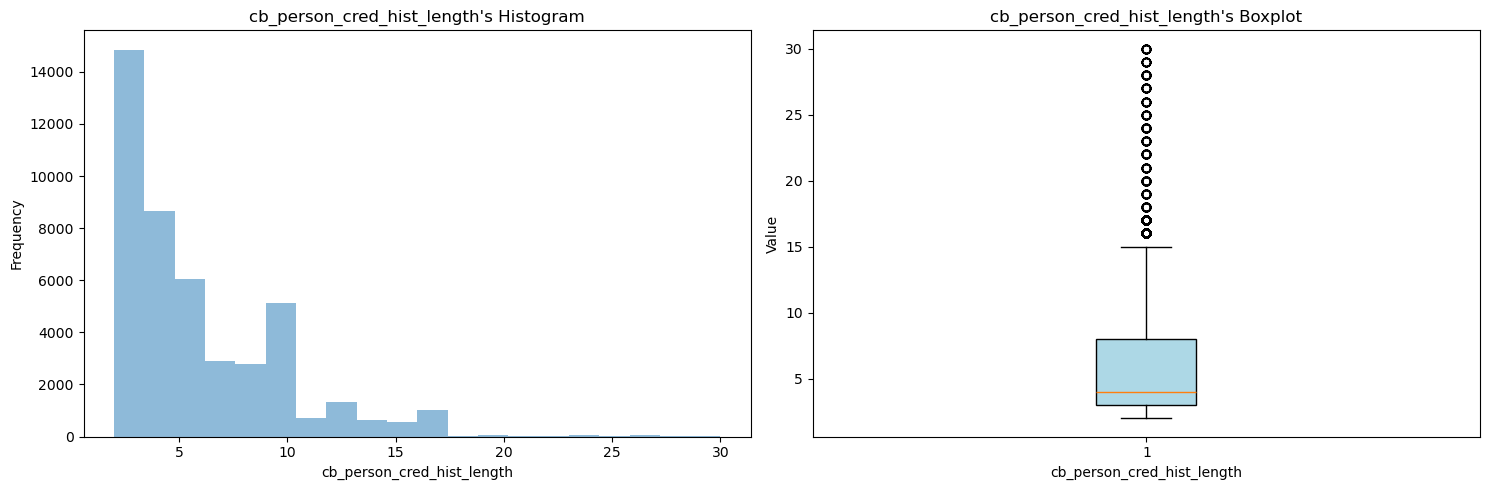

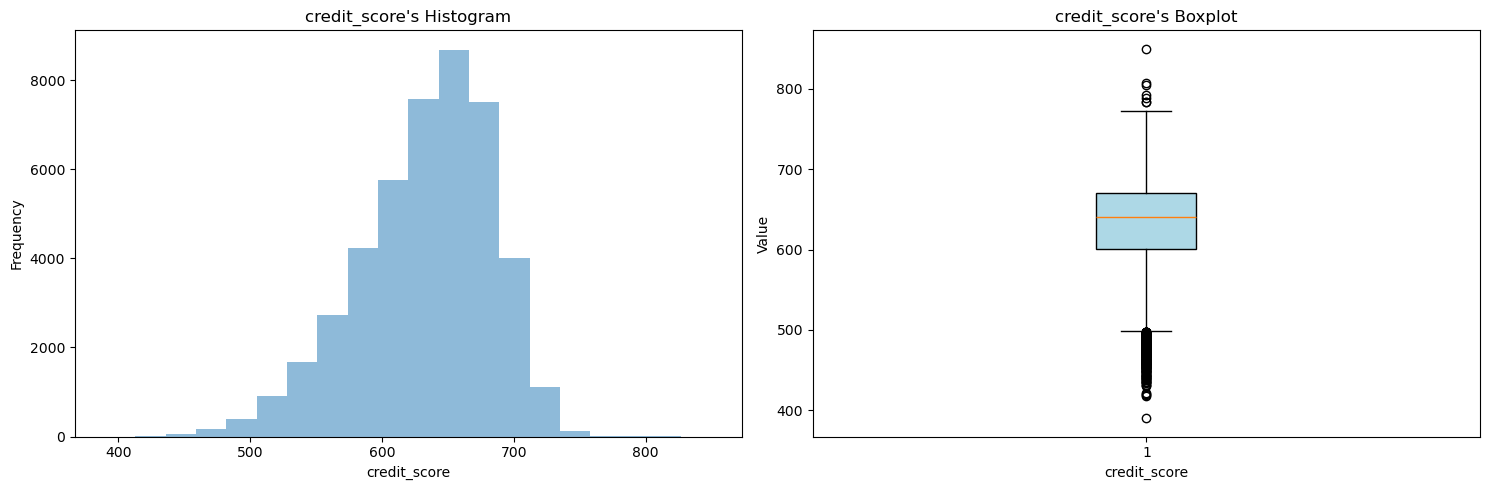

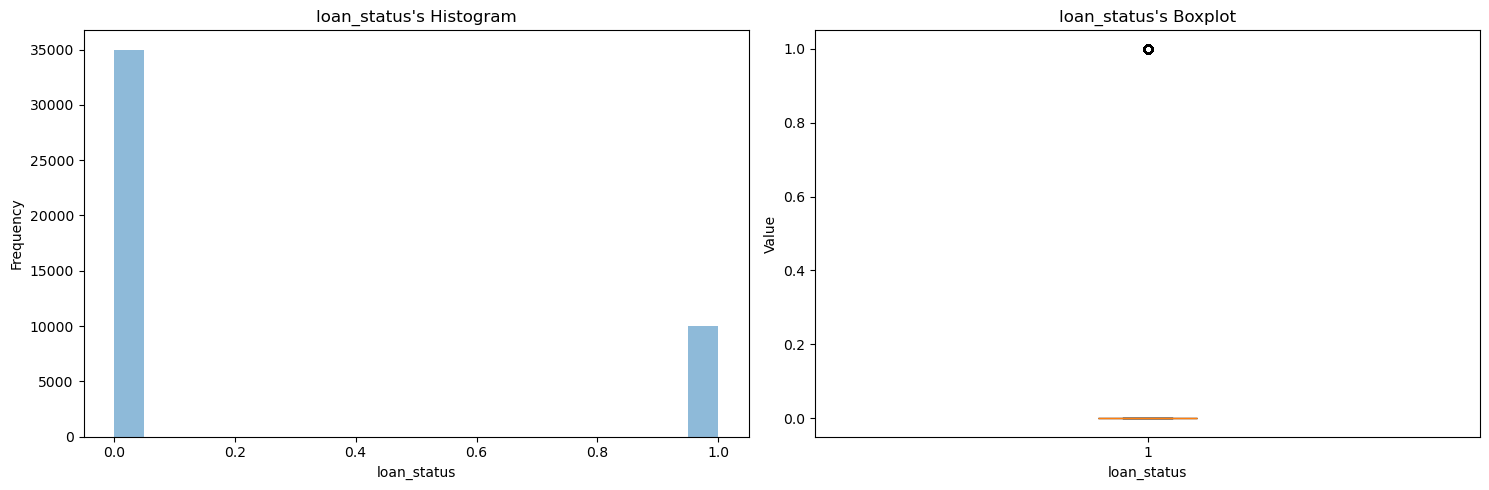

In [14]:
def plot_num(df, num_col):
    """
    Plotting histogram dan barchart untuk setiap kolom numerik
    Menggunakan matplotlib untuk plotting hist dan boxplot
    Set title dan label
    
    Args:
        df: DataFrame
        num_col: numerical columns
    """
    for col in num_col:
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        ax[0].hist(df[col], bins = 20, alpha = 0.5)
        ax[0].set_title(f"{col}\'s Histogram")
        ax[0].set_xlabel(col)
        ax[0].set_ylabel("Frequency")
        
        
        ax[1].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
        ax[1].set_title(f"{col}\'s Boxplot")
        ax[1].set_xlabel(col)
        ax[1].set_ylabel("Value")
        
        plt.tight_layout()
        plt.show()
        
plot_num(df, num_col)

**💡Insight:**
- Data Categorical sudah terdistribusi dengan baik
- Beberapa data numerik masih anomali
- Kolom age income dan experience sepertinta punya outlier yang ekstrim
- Kolom loan amount, interest rate percent income dan credit history memiliki sedikit outlier
- Kolom credit_score terdistribusi normal dengan sedikit left_skewed
- Kolom loan_status bisa diabaikan karena bentuknya categorical

### Analysis data anomaly

Cek korelasi antara data numeric

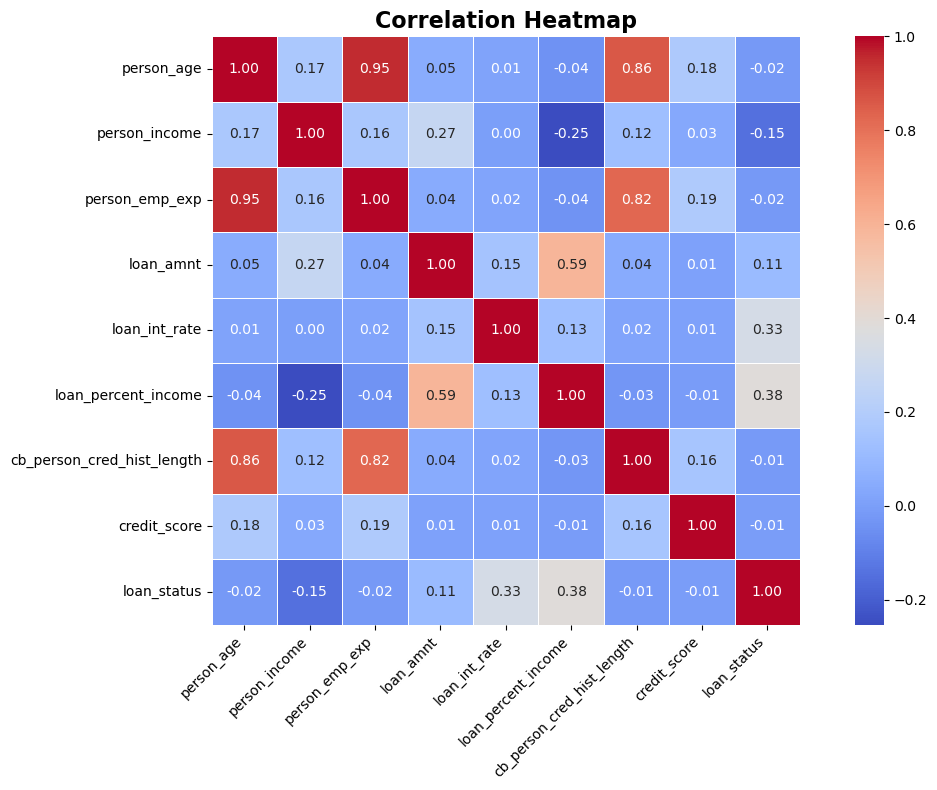

In [ ]:
df_corr = df[num_col].corr()

plt.figure(figsize=(12, 8)) 
sns.heatmap(
    df_corr,
    annot=True,          
    fmt=".2f",             
    cmap="coolwarm",       
    linewidths=0.5,        
    linecolor='white', 
    cbar=True,         
    square=True,         
    annot_kws={"size": 10} 
)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Loan status tidak begitu memiliki korelasi dengan fitur"

In [16]:
df[df['person_age'] > 70]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3,789,No,0
183,144,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2,807,No,0
575,123,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3,805,Yes,0
747,123,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4,714,Yes,0
32297,144,female,Associate,NaN,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25,850,No,0
32355,78,male,Associate,58463.0,57,RENT,3000.0,MEDICAL,7.51,0.05,25,754,No,0
32381,73,female,Bachelor,51415.0,47,MORTGAGE,5000.0,PERSONAL,7.49,0.10,28,706,No,0
32416,94,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27,773,No,0
32422,80,male,High School,77894.0,62,RENT,6800.0,MEDICAL,11.71,0.09,25,673,No,0
32432,73,male,Bachelor,90678.0,47,RENT,7800.0,MEDICAL,11.01,0.09,24,696,Yes,0


Jarang sekali ada yang bisa hidup 70 bahkan sampai ratusan tahun, jika dilihat mereka juga tidak diterima peminjamannya, maka data ini bisa dihapus saja

Karena data ini berkorelasi dengan experience maka kolom person experience juga otomastis terhapus

In [17]:
df = df.drop(df[df['person_age'] > 70].index)

In [19]:
df['person_income'].sort_values(ascending=False, na_position='last')

30049    2448661.0
32546    2280980.0
32497    2139143.0
37175    2012954.0
41288    1741243.0
           ...    
44940          NaN
44942          NaN
44967          NaN
44972          NaN
44977          NaN
Name: person_income, Length: 44985, dtype: float64

In [20]:
df[df['person_income'] > 800000]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
17833,32,female,High School,1440746.0,6,MORTGAGE,12000.0,VENTURE,7.51,0.01,8,613,No,0
17834,34,male,Bachelor,1138723.0,12,MORTGAGE,2000.0,PERSONAL,9.99,0.00,7,609,Yes,0
25714,32,male,Bachelor,845636.0,13,RENT,12000.0,MEDICAL,15.33,0.01,9,648,No,1
27882,31,male,High School,890990.0,10,MORTGAGE,12000.0,MEDICAL,10.25,0.01,6,599,No,0
27883,32,male,Bachelor,900803.0,10,MORTGAGE,30000.0,DEBTCONSOLIDATION,9.91,0.03,8,647,Yes,0
27884,35,female,Associate,915386.0,14,OWN,10000.0,MEDICAL,8.94,0.01,10,630,Yes,0
28253,35,female,Associate,915203.0,10,OWN,10000.0,MEDICAL,8.94,0.01,8,676,No,0
29119,36,male,Doctorate,1440982.0,15,OWN,10000.0,MEDICAL,6.54,0.01,11,682,Yes,0
29120,40,female,Bachelor,1440915.0,19,MORTGAGE,10000.0,MEDICAL,11.01,0.01,16,637,Yes,0
29121,50,male,High School,1081082.0,28,MORTGAGE,30000.0,DEBTCONSOLIDATION,12.69,0.03,15,643,No,0


Orang yg income tahunan > 800000 merupakan outlier yg ekstrim, selain itu biasanya loan_status mereka juga ditolak, jadi bisa langsung dihapus aja

In [21]:
df = df.drop(df[df['person_income'] > 800000].index)

### Check Distribution part 2

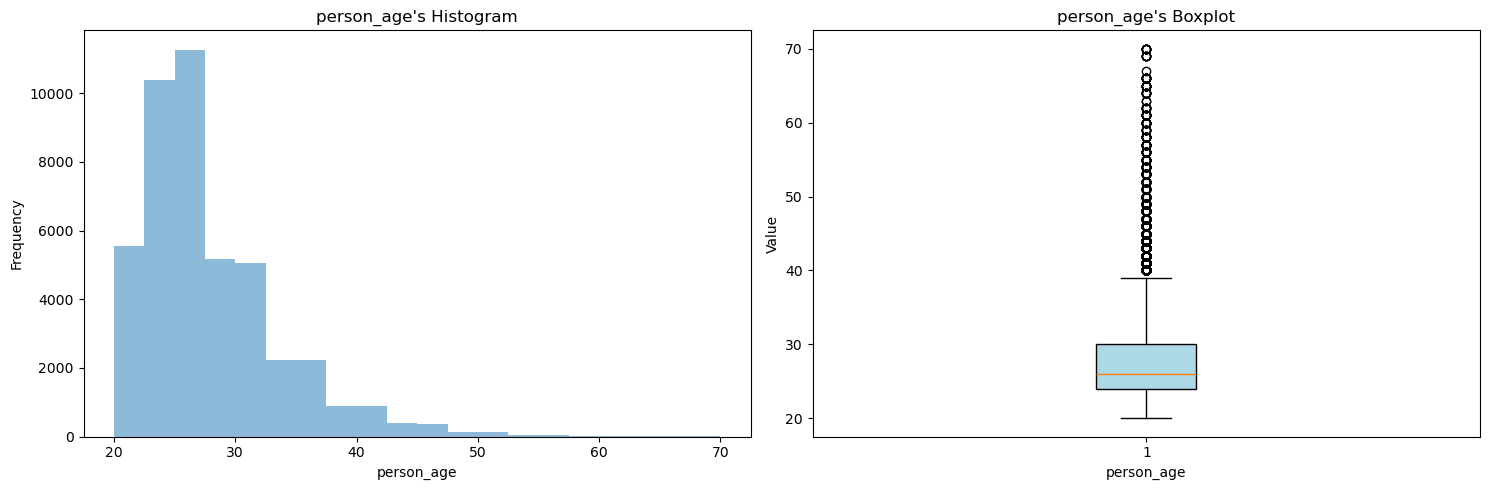

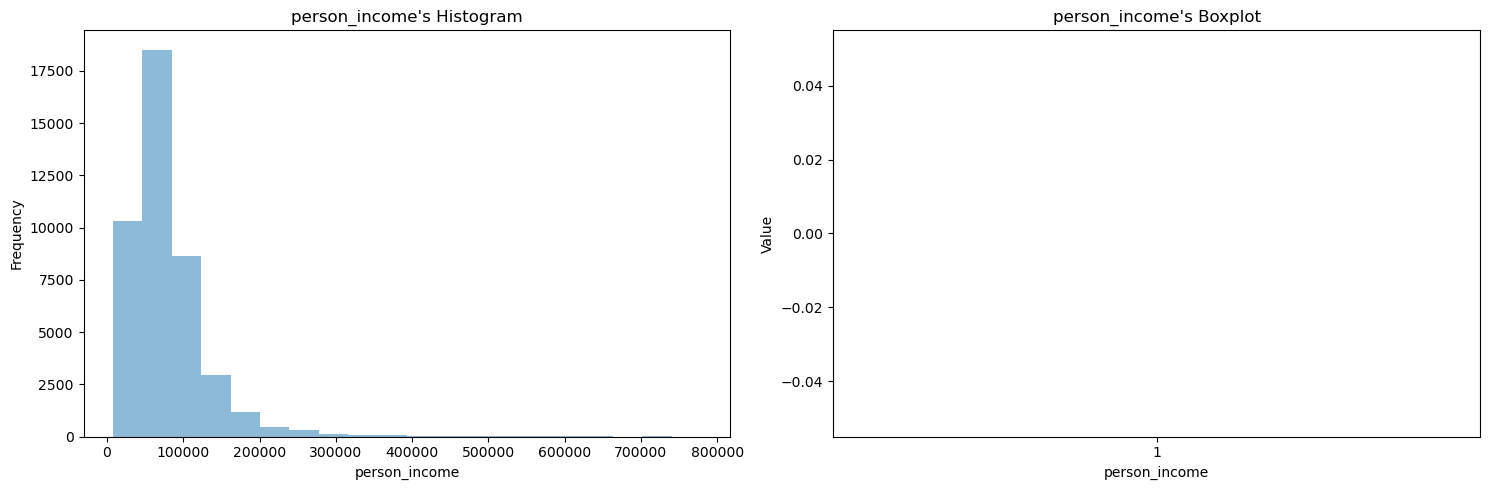

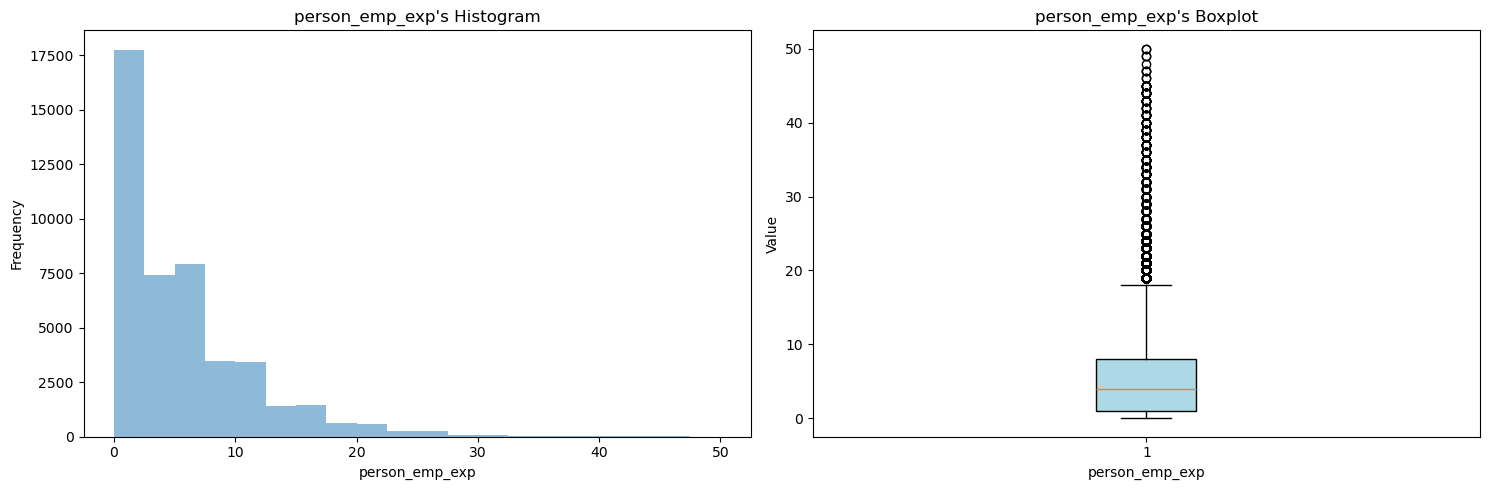

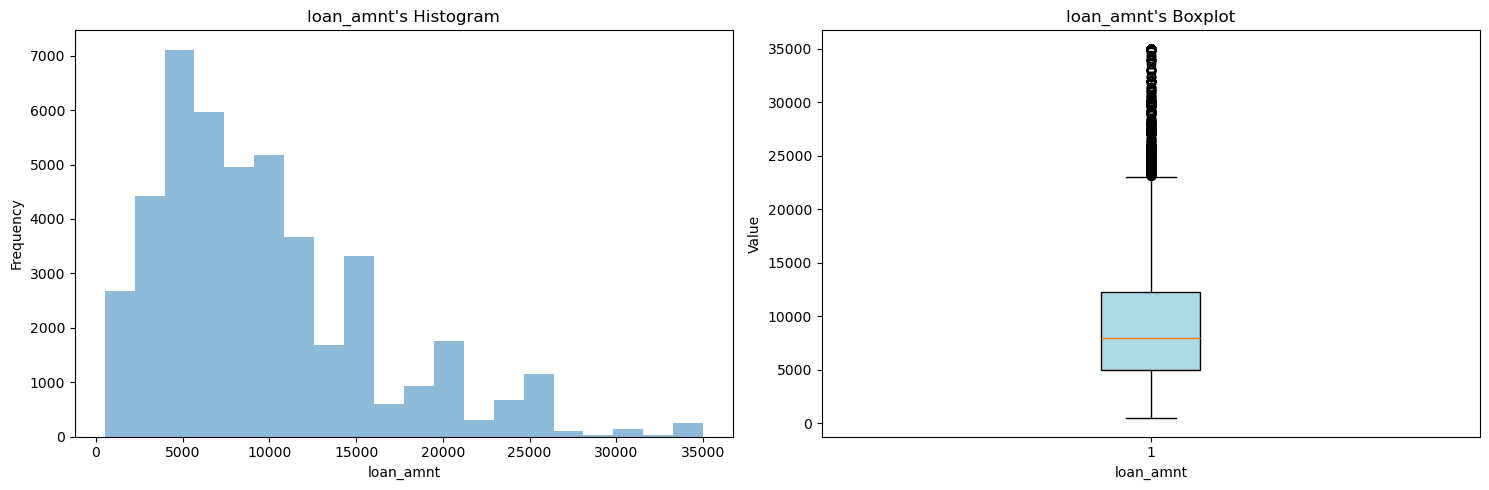

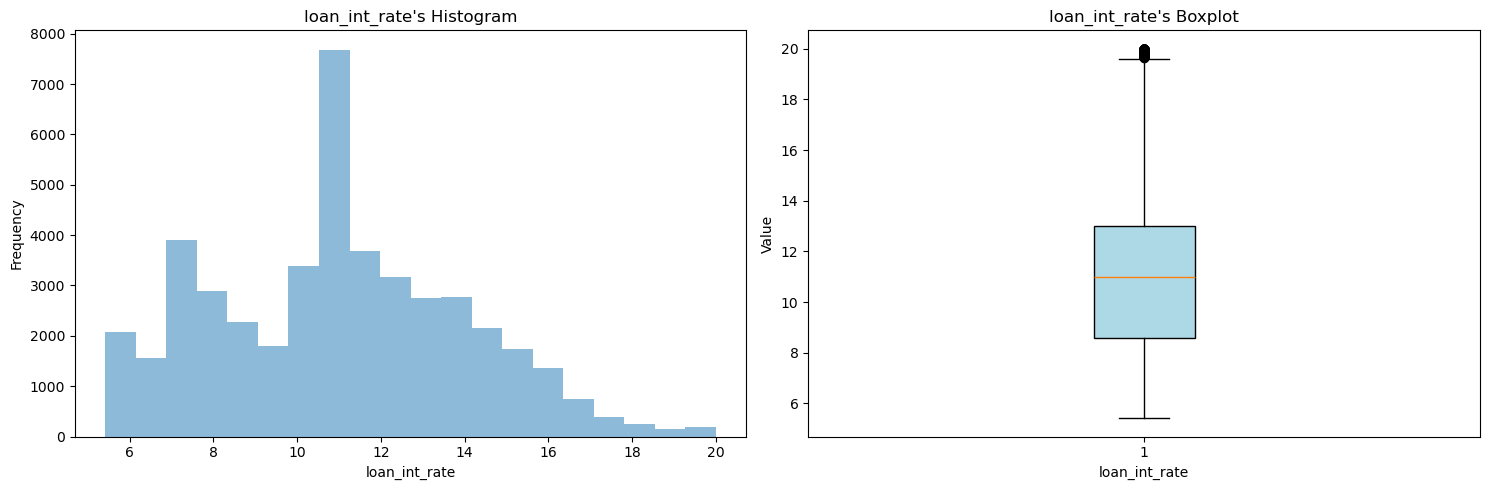

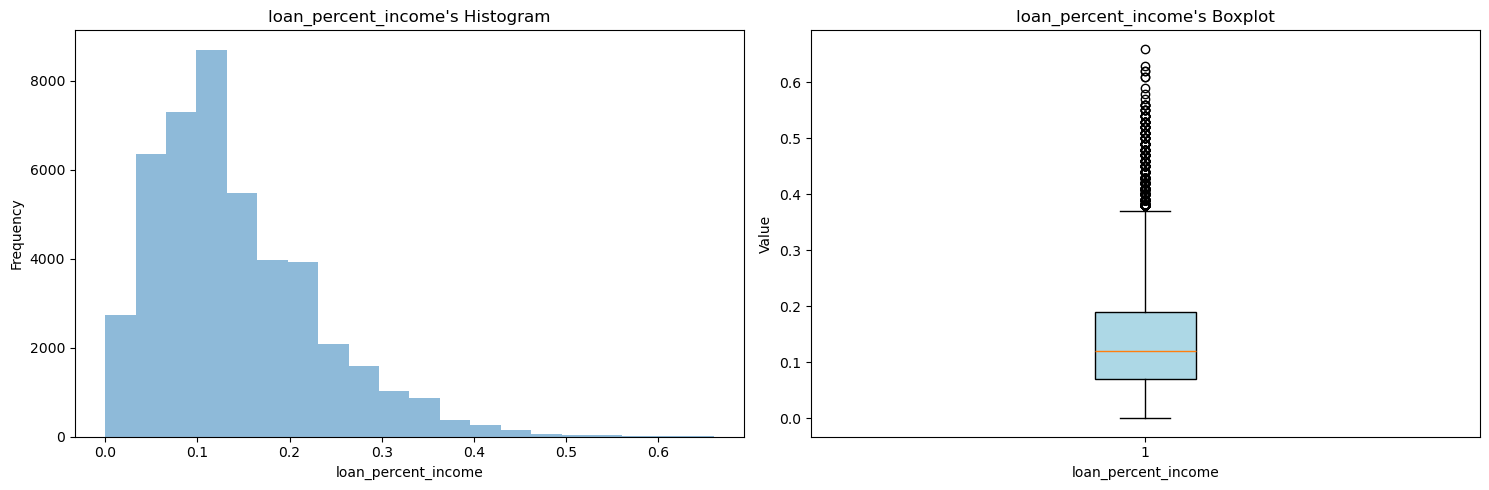

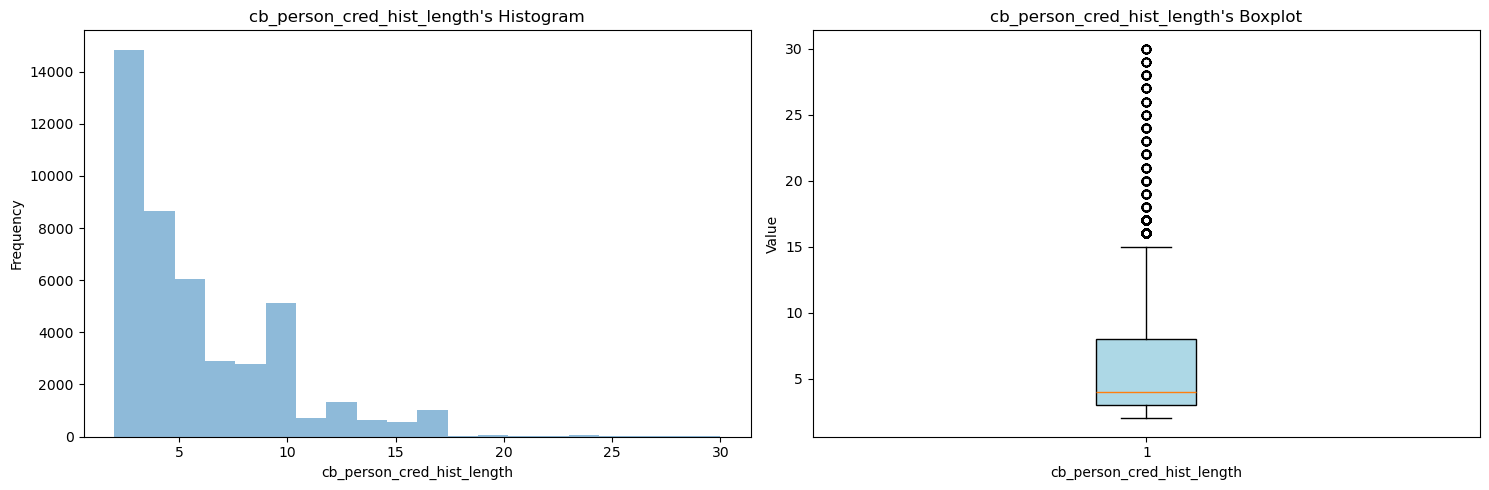

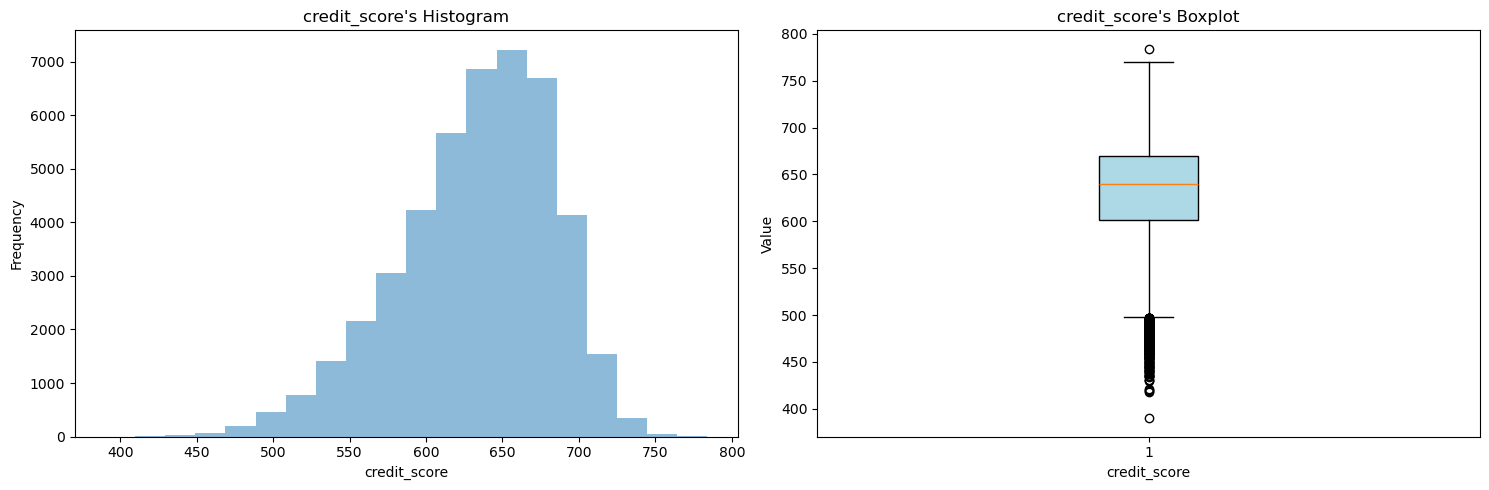

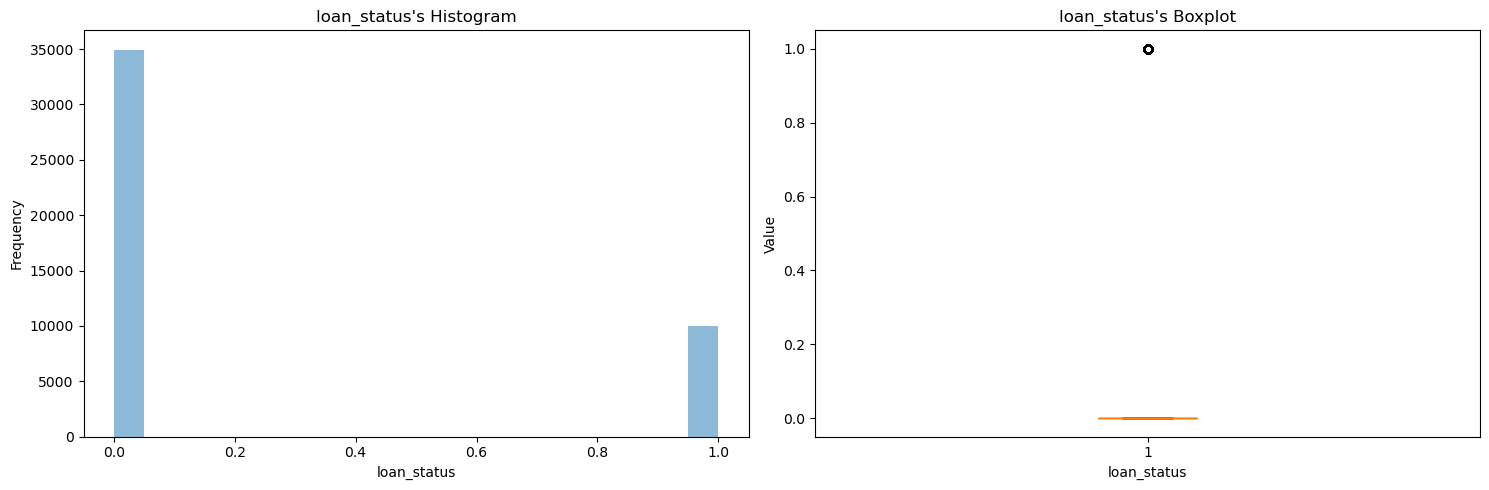

In [22]:
def plot_num(df, num_col):
    """
    Plotting histogram dan barchart untuk setiap kolom numerik
    Menggunakan matplotlib untuk plotting hist dan boxplot
    Set title dan label
    
    Args:
        df: DataFrame
        num_col: numerical columns
    """
    for col in num_col:
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        ax[0].hist(df[col], bins = 20, alpha = 0.5)
        ax[0].set_title(f"{col}\'s Histogram")
        ax[0].set_xlabel(col)
        ax[0].set_ylabel("Frequency")
        
        
        ax[1].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
        ax[1].set_title(f"{col}\'s Boxplot")
        ax[1].set_xlabel(col)
        ax[1].set_ylabel("Value")
        
        plt.tight_layout()
        plt.show()
        
plot_num(df, num_col)

**🔎 Outlier Analysis:**
Meskipun masih terdapat outlier tapi ini sudah lebih masuk akal:
- Age, experience & credit_history sudah wajar, karena orang dengan usia 70 mungkin masih bisa diberi pinjaman
- Income > 300000 sudah minoritas namun masi mungkin untuk mengajukan pinjaman
- Ada kemungkinan loan amount, interest & percent_income untuk outlier tergantung dengan kebutuhan dan profil peminjam


Range kredit score dari lembaga keuangan biasanya seperti berikut

|Range Skor | Kategori | Interpretasi   |
|-----------|-----------|--------------------------------|
|300 – 579 | Poor | High risk; kemungkinan besar akan ditolak kredit    |
|580 – 669 | Fair | Risiko menengah; bisa disetujui tapi bunganya tinggi    |
|670 – 739 | Good | Cukup bagus; mayoritas pinjaman disetujui   |
|740 – 799 | Very Good | Layak mendapat bunga lebih rendah  |
|800 – 850 | Exceptional | Risiko sangat rendah; dapat bunga dan penawaran terbaik  |

Karena kolom kredit_score berada dalam rentang ini, maka bisa dikatakan valid

Overall semua data outlier sudah bisa digunakan untuk proses lebih lanjut

### Handling Missing Value

Karena datanya sangat right skew, kita bisa input dengan nilai median aja, saya juga tambahkan kolom `person_income_missing` yang menandakan bahwa sebelumnya kolom ini missing untuk menambah informasi kepada model

In [23]:
# Menandakan data yg aslinya missing
df['person_income_missing'] = df['person_income'].isna().astype(int)

# Isi median berdasarkan status pendidikan mereka
df['person_income'] = df.groupby('person_education')['person_income'].transform(lambda x: x.fillna(x.median()))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44947 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44947 non-null  int32  
 1   person_gender                   44947 non-null  object 
 2   person_education                44947 non-null  object 
 3   person_income                   44947 non-null  float64
 4   person_emp_exp                  44947 non-null  int64  
 5   person_home_ownership           44947 non-null  object 
 6   loan_amnt                       44947 non-null  float64
 7   loan_intent                     44947 non-null  object 
 8   loan_int_rate                   44947 non-null  float64
 9   loan_percent_income             44947 non-null  float64
 10  cb_person_cred_hist_length      44947 non-null  int32  
 11  credit_score                    44947 non-null  int64  
 12  previous_loan_defaults_on_file  44947

Semua data sudah clean dan siap untuk preprocessing

## Splitting Data

In [25]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(35957, 14) (8990, 14)


## Data Preprocessing

Model yang akan digunakan adalah XGBoostClassifier dan RandomForestClassifier yang dimana merupakan bagian dari decision tree dan tidak terpengaruh oleh scale dari data, maka kita hanya perlu fokus untuk encode data categorical

Label encoding untuk data binary

In [27]:
X_train['person_gender'] = X_train['person_gender'].map({"male":0, "female":1})
X_train['previous_loan_defaults_on_file'] = X_train['previous_loan_defaults_on_file'].map({"No":0, "Yes":1})

X_test['person_gender'] = X_test['person_gender'].map({"male":0, "female":1})
X_test['previous_loan_defaults_on_file'] = X_test['previous_loan_defaults_on_file'].map({"No":0, "Yes":1})

One-hot-encoding untuk kolom multiclass

In [28]:
# Category yg akan di onehot
multi_category = ['person_education', 'person_home_ownership', 'loan_intent']

preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), multi_category)
], remainder='passthrough')  #  agar kolom lain tidak hilang

# Transform datanya
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

Preview data sebelum modelling

In [29]:
pd.DataFrame(X_train_encoded)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,77793.0,22.0,15000.0,7.88,0.19,17.0,692.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,67046.0,6.0,9000.0,16.77,0.13,2.0,580.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,37026.0,14.0,2972.0,10.71,0.08,8.0,677.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,44203.0,0.0,15000.0,13.85,0.34,3.0,630.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,187273.0,9.0,15000.0,11.23,0.08,8.0,595.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35952,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,88410.0,0.0,7000.0,10.59,0.08,2.0,650.0,0.0,0.0
35953,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,16735.0,0.0,2728.0,14.11,0.16,2.0,674.0,0.0,0.0
35954,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,49245.0,4.0,4807.0,12.11,0.10,4.0,639.0,1.0,0.0
35955,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,202337.0,2.0,20000.0,11.36,0.10,4.0,652.0,0.0,0.0


In [30]:
pd.DataFrame(X_test_encoded)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,129398.0,18.0,3754.0,12.88,0.03,12.0,669.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,61765.0,23.0,12000.0,13.06,0.19,12.0,671.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,70798.0,10.0,3625.0,6.17,0.05,5.0,498.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,45008.0,3.0,5000.0,10.65,0.11,4.0,551.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,121070.0,4.0,18000.0,13.99,0.15,6.0,562.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,212136.0,10.0,22320.0,15.84,0.11,12.0,634.0,0.0,0.0
8986,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,85760.0,5.0,19000.0,6.54,0.22,9.0,682.0,1.0,0.0
8987,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,36887.0,12.0,10000.0,14.42,0.27,9.0,690.0,0.0,0.0
8988,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,168807.0,2.0,16400.0,15.96,0.10,2.0,621.0,0.0,0.0


## Modelling

Perbandingan RandomForest dan XGB dengan hypertuning parameter

In [31]:
# Setting model
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

Setting parameter model untuk di hypertune

In [32]:
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini','entropy','log_loss'],
    'max_features': ['sqrt', 'log2', None]
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'max_leaves': [2, 4, 6],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'gamma': [0, 1, 5],  
    'reg_alpha': [0, 0.5, 1],  
    'reg_lambda': [1, 1.5, 2], 
}

Hypertune model dengan randomized dengan 50iterasi agar tidak terlalu berat

In [33]:
rf_search = RandomizedSearchCV(
    rf, rf_params, cv=3, n_iter=50,
    scoring='f1', n_jobs=-1, verbose=2, random_state=42
)

xgb_search = RandomizedSearchCV(
    xgb, xgb_params, cv=3, n_iter=50,
    scoring='f1', n_jobs=-1, verbose=2, random_state=42
)

In [34]:
rf_search.fit(X_train_encoded, y_train)
xgb_search.fit(X_train_encoded, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 1, 5],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_leaves': [2, 4, 6],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [1, 1.5, 2]},
                   random_state=42, scoring='f1', verbose=2)

## Evaluation

In [35]:
rf_best = rf_search.best_estimator_
xgb_best = xgb_search.best_estimator_

rf_pred = rf_best.predict(X_test_encoded)
xgb_pred = xgb_best.predict(X_test_encoded)

print("Best RF Params:", rf_search.best_params_)
print("Best XGB Params:", xgb_search.best_params_)


Best RF Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini'}
Best XGB Params: {'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 300, 'max_leaves': 6, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1}


In [36]:
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7001
           1       0.90      0.77      0.83      1989

    accuracy                           0.93      8990
   macro avg       0.92      0.87      0.89      8990
weighted avg       0.93      0.93      0.93      8990

XGBoost Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7001
           1       0.88      0.79      0.83      1989

    accuracy                           0.93      8990
   macro avg       0.91      0.88      0.89      8990
weighted avg       0.93      0.93      0.93      8990



Cek accuracy untuk data test

In [37]:
print(accuracy_score(y_test, rf_pred))
print(accuracy_score(y_test, xgb_pred))

0.9300333704115684
0.9290322580645162


Cek akurasi untuk data train

In [40]:
rf_pred_train = rf_best.predict(X_train_encoded)
xgb_pred_train = xgb_best.predict(X_train_encoded)

print(accuracy_score(y_train, rf_pred_train))
print(accuracy_score(y_train, xgb_pred_train))

1.0
0.9295547459465473


Evaluasi kedua model cukup mirip namun XGB sedikit lebih bagus karena tidak overfit, maka kita akan save model XGB saja

## Save Model

In [38]:
# Save one hot encoder 
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# Save XGB model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_best, f)